In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
train_data = pd.read_csv("/content/df_train.csv")

In [ ]:
train_data.head()

,date,price,bedrooms,grade,has_basement,living_in_m2,renovated,nice_view,perfect_condition,real_bathrooms,has_lavatory,single_floor,month,quartile_zone
0,2014-05-15,312000.0,2,2,True,138.42547,False,False,False,2,True,False,5,1
1,2014-11-14,310000.0,2,2,False,105.90942,False,False,False,1,True,False,11,3
2,2014-12-24,320000.0,2,2,False,117.98681,False,True,False,1,False,True,12,2
3,2015-02-22,264500.0,2,3,False,151.43189,False,False,False,2,True,True,2,1
4,2015-01-06,700000.0,3,2,True,341.88304,False,False,False,3,False,False,1,4


In [ ]:
train_data.isna().sum()

,0
date,0
price,0
bedrooms,0
grade,0
has_basement,0
living_in_m2,0
renovated,0
nice_view,0
perfect_condition,0
real_bathrooms,0


In [ ]:
train_data['date']

,date
0,2014-05-15
1,2014-11-14
2,2014-12-24
3,2015-02-22
4,2015-01-06
...,...
13598,2014-10-07
13599,2014-08-08
13600,2014-07-17
13601,2014-11-26


In [ ]:
train_data_new = train_data.drop(columns=['date'])

In [ ]:
train_data_new.head()

,price,bedrooms,grade,has_basement,living_in_m2,renovated,nice_view,perfect_condition,real_bathrooms,has_lavatory,single_floor,month,quartile_zone
0,312000.0,2,2,True,138.42547,False,False,False,2,True,False,5,1
1,310000.0,2,2,False,105.90942,False,False,False,1,True,False,11,3
2,320000.0,2,2,False,117.98681,False,True,False,1,False,True,12,2
3,264500.0,2,3,False,151.43189,False,False,False,2,True,True,2,1
4,700000.0,3,2,True,341.88304,False,False,False,3,False,False,1,4


In [ ]:
train_data_new['has_basement'] = train_data_new['has_basement'] .astype(int)
train_data_new['renovated'] = train_data_new['renovated'] .astype(int)
train_data_new['nice_view'] = train_data_new['nice_view'] .astype(int)
train_data_new['perfect_condition'] = train_data_new['perfect_condition'] .astype(int)
train_data_new['has_lavatory'] = train_data_new['has_lavatory'] .astype(int)
train_data_new['single_floor'] = train_data_new['single_floor'] .astype(int)

In [ ]:
train_data_new.dtypes

,0
price,float64
bedrooms,int64
grade,int64
has_basement,int64
living_in_m2,float64
renovated,int64
nice_view,int64
perfect_condition,int64
real_bathrooms,int64
has_lavatory,int64


In [ ]:
def make_prediction(data):
  X_mean = data['living_in_m2'].mean()
  Y_mean = data['price'].mean()
  data['x_variance'] = data['living_in_m2'] - X_mean
  data['y_variance'] = data['price'] - Y_mean

  data['m_nominator'] = data['x_variance'] * data['y_variance']
  nominator = data['m_nominator'].sum()
  data['d_nominator'] = data['x_variance'] ** 2
  denominator = data['d_nominator'].sum()
  m_ = nominator/ denominator
  b = Y_mean - m_ * X_mean
  data['y_pred'] = m_ * data['living_in_m2'] + b

In [ ]:
test_data = pd.read_csv('/content/df_test.csv')

In [ ]:
make_prediction(test_data)
test_data.head()

,date,price,bedrooms,grade,has_basement,living_in_m2,renovated,nice_view,perfect_condition,real_bathrooms,has_lavatory,single_floor,month,quartile_zone,x_variance,y_variance,m_nominator,d_nominator,y_pred
0,2014-09-26,305000.0,2,1,False,76.18046,False,False,True,1,False,True,9,2,-105.253331,-170412.28,1.793646e+07,11078.263622,279873.519443
1,2014-05-14,498000.0,3,2,True,210.88981,False,False,False,2,True,True,5,2,29.456019,22587.72,6.653443e+05,867.657073,530135.427173
2,2015-03-23,590000.0,2,4,False,262.91549,False,False,False,2,True,False,3,2,81.481699,114587.72,9.336802e+06,6639.267322,626788.301882
3,2014-07-15,775000.0,3,3,False,159.79316,False,False,False,1,True,False,7,3,-21.640631,299587.72,-6.483267e+06,468.316897,435208.496654
4,2015-04-14,350000.0,2,1,False,92.90300,False,False,False,1,True,True,4,3,-88.530791,-125412.28,1.110285e+07,7837.700901,310940.514885


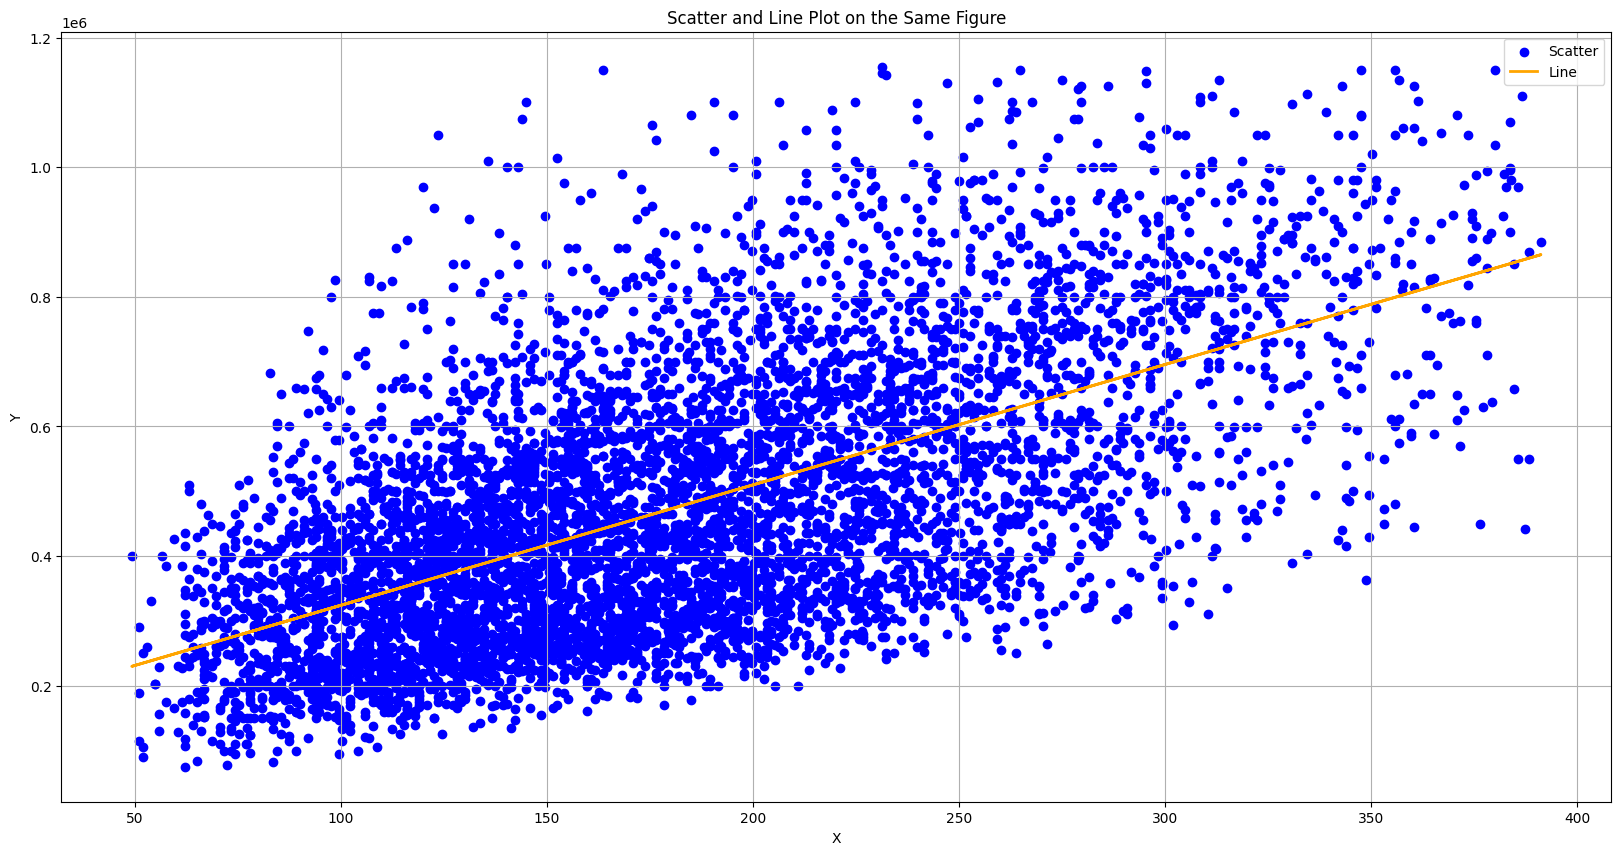

In [ ]:
# Create a figure and axis
plt.figure(figsize=(20, 10))

# Scatter plot
plt.scatter(test_data['living_in_m2'], test_data['price'], color='blue', label='Scatter', marker='o')

# Line plot
plt.plot(test_data['living_in_m2'], test_data['y_pred'], color='orange', label='Line', linewidth=2)

# Add labels and title
plt.title('Scatter and Line Plot on the Same Figure')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.show()

In [ ]:
linear_reg = LinearRegression()

In [ ]:
linear_reg.fit(train_data_new[['living_in_m2']], train_data_new[['price']])

LinearRegression()

In [ ]:
test_data = pd.read_csv("df_test.csv")

In [ ]:
test_data['living_in_m2']

,living_in_m2
0,76.18046
1,210.88981
2,262.91549
3,159.79316
4,92.90300
...,...
6695,188.59309
6696,234.11556
6697,169.08346
6698,155.14801


In [ ]:
predicted_price = linear_reg.predict(test_data[['living_in_m2']])
predicted_price

array([[277665.99615184],
       [529843.25875859],
       [627235.85673085],
       ...,
       [451581.34967374],
       [425494.04664545],
       [354188.75170148]])

In [ ]:
make_prediction(test_data)
test_data.head()

,date,price,bedrooms,grade,has_basement,living_in_m2,renovated,nice_view,perfect_condition,real_bathrooms,has_lavatory,single_floor,month,quartile_zone,x_variance,y_variance,m_nominator,d_nominator,y_pred
0,2014-09-26,305000.0,2,1,False,76.18046,False,False,True,1,False,True,9,2,-105.253331,-170412.28,1.793646e+07,11078.263622,279873.519443
1,2014-05-14,498000.0,3,2,True,210.88981,False,False,False,2,True,True,5,2,29.456019,22587.72,6.653443e+05,867.657073,530135.427173
2,2015-03-23,590000.0,2,4,False,262.91549,False,False,False,2,True,False,3,2,81.481699,114587.72,9.336802e+06,6639.267322,626788.301882
3,2014-07-15,775000.0,3,3,False,159.79316,False,False,False,1,True,False,7,3,-21.640631,299587.72,-6.483267e+06,468.316897,435208.496654
4,2015-04-14,350000.0,2,1,False,92.90300,False,False,False,1,True,True,4,3,-88.530791,-125412.28,1.110285e+07,7837.700901,310940.514885


In [ ]:
mse = ((test_data['price'] - test_data['y_pred']) ** 2).sum() / (test_data.shape[0])
mse

27172074066.20447

In [ ]:
lib_mse = mean_squared_error(test_data['price'], predicted_price)
lib_mse

27173522924.3307

In [ ]:
train_data_new[['price']].shape

(13603, 1)

In [ ]:
train_data_new['price'].values.reshape(-1, 1).shape

(13603, 1)